 svid
131    19547
138    19547
136    19547
125    18118
120    12827
Name: count, dtype: int64


ds    2018-10-15 23:59:00
y                     0.6
dtype: object

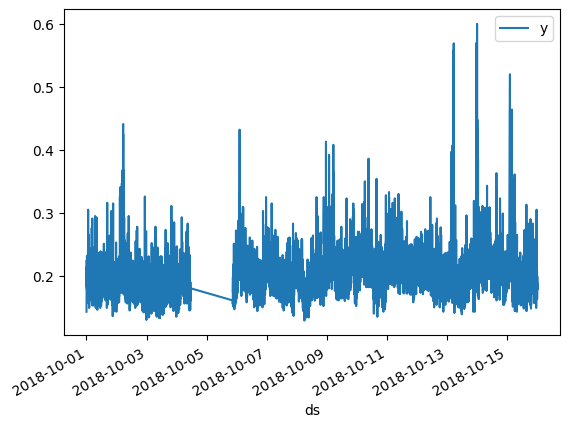

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/home/lemateus/TCC/cintilacao/data/PRU2_2018-10-01_2018-10-15_bb7dc5eebff60d3a4aa2ab4ccb5cfb87EDITADO.csv', na_values=[' ', ''])

data['time_utc'] = pd.to_datetime(data['time_utc'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[data['time_utc']>'2018-09-04 14:10:00']
print(data[' svid'].value_counts()[:5])
data = data[data[' svid']==131]
data = data[['time_utc', ' s4']]
data.columns = ['ds', 'y']
data['y'] = data['y'].astype(float)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.plot(x='ds', y='y')
data.max()

In [20]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['y'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -9.033116
p-value: 0.000000


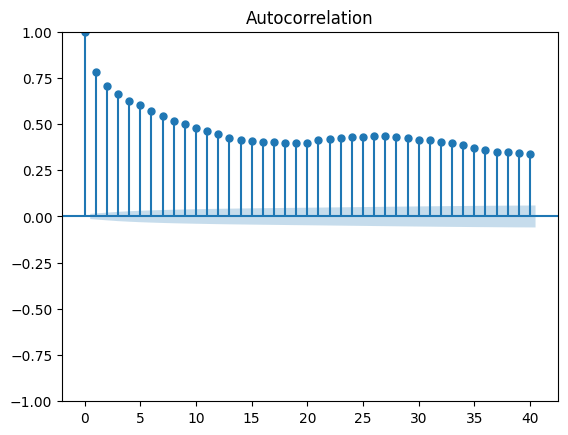

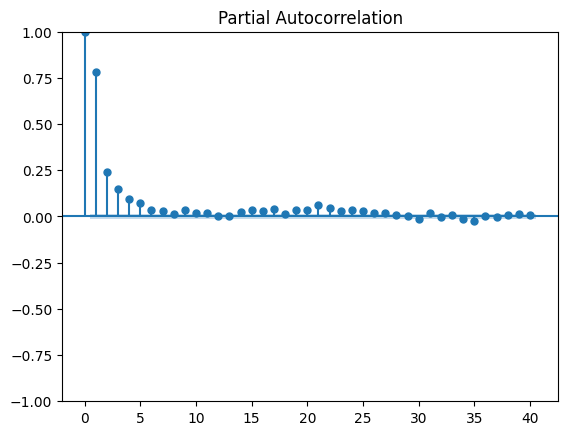

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['y'], lags=40)
plot_pacf(data['y'], lags=40)
plt.show()

In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['y'], order=(1, 0, 1))
model_fit = model.fit()

In [23]:
forecast = model_fit.get_forecast(steps=30)


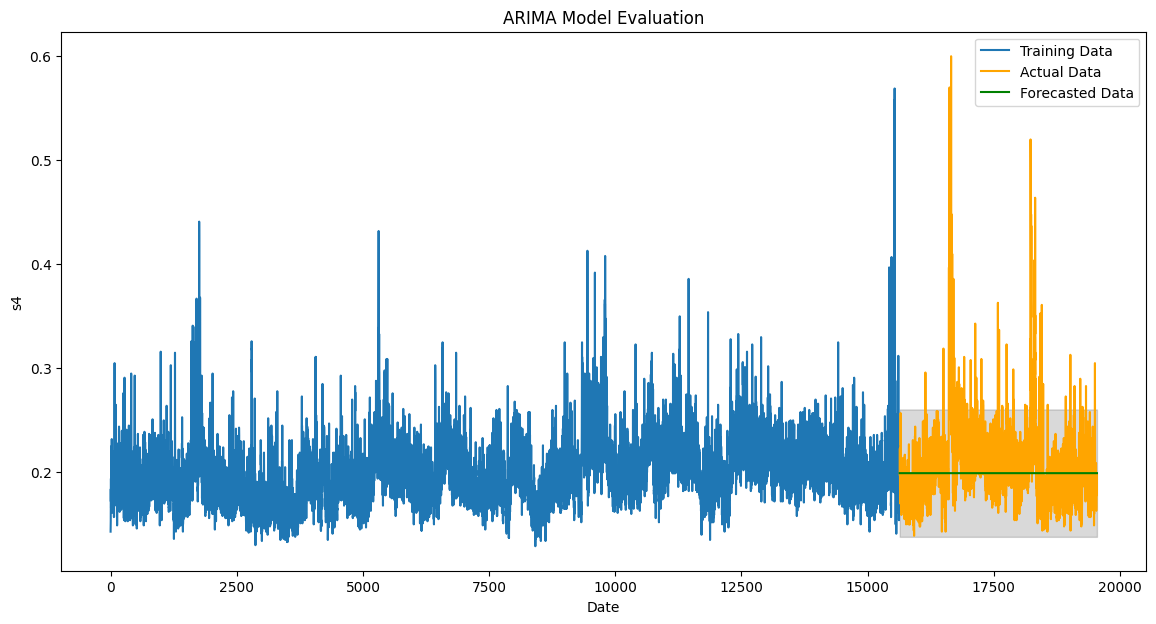

RMSE: 0.03921271185939988


In [24]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['y'])#, order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['y'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['y'], label='Training Data')
plt.plot(test['y'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('s4')
plt.legend()
plt.show()

print('RMSE:', rmse)